# This is a quick script to check the validity of the returns series as provided by BBG
#### ->> API access, get returns, calculate variance etc. 

In [44]:
%matplotlib inline
# coding=utf-8

# Python 3 style division operator w/o the need to convert to float
from __future__ import division

import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.covariance import LedoitWolf, empirical_covariance

# API_KEY := GHRcD6qdzbB5dYQAQvDQ
# YAHOO/AAPL
# GOOG/NASDAQ_YHOO
# GOOG/NASDAQ_AMZN

quandl.ApiConfig.api_key = "GHRcD6qdzbB5dYQAQvDQ"

stockList = ['YAHOO/AAPL', 'GOOG/NASDAQ_YHOO', 'GOOG/NASDAQ_AMZN']
bucket = []
for item in stockList:
    data = quandl.get(item, 
                      start_date="2014-01-01", 
                      end_date="2016-08-01", 
                      transform="rdiff")
    bucket.append(data)

pxList = []
for item in bucket:
    df = pd.DataFrame(item)
    pxLast = df.Close
    pxList.append(pxLast)

df = pd.DataFrame(pxList,columns=stockList)

In [45]:
# To pandas
df = pd.DataFrame(pxList).transpose()
df.columns = stockList

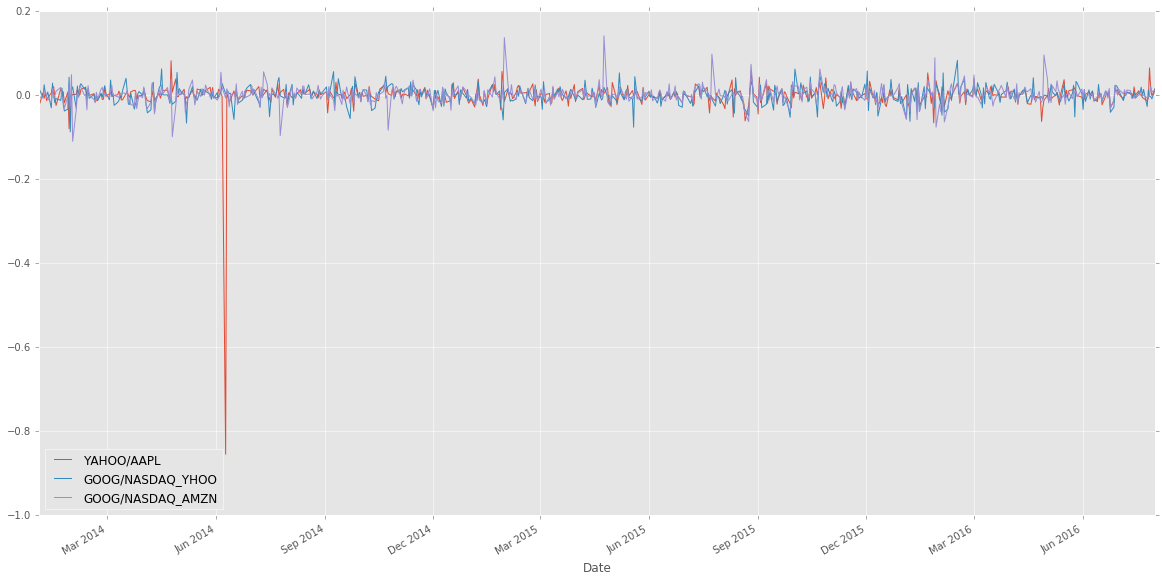

In [46]:
df.plot(figsize=(20,10))

In [53]:
# Estimate covariance using LedoitWolf, first create instance of object
lw = LedoitWolf(assume_centered=True)
lwFitted = lw.fit(X=df).covariance_

# Estimate covariance using Empirical/MLE 
mleFitted = empirical_covariance(X=df, assume_centered=True)

# Test for definiteness of the covariance matrix, as suggested by TOBAM paper
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

print "MLE Method"
print is_pos_def(mleFitted)

print "LW Method"
print is_pos_def(lwFitted)

# Test portfolio variance for different estimation procedures
# Suppose pVar = w'Sw
N = df.shape[1]
w = [1/N] * N
w = np.asarray(w)
pVarMLE = np.dot((np.dot(np.transpose(w), mleFitted)), w)
pVarLW  = np.dot((np.dot(np.transpose(w), lwFitted)), w)

MLE Method
True
LW Method
True


In [54]:
pVarLW

0.00024574075264704423

In [55]:
pVarLW

0.00024574075264704423

# Conclusion
#### ->> probable that the numbers obtained from BBG are within the realm of plausibility. Continue to debug the optimization routine in KNITRO

In [59]:
abs(np.random.randn(3))

array([ 0.30822427,  0.61324053,  0.59415504])